<a href="https://colab.research.google.com/github/mfernandes10/MetNumUN2023I/blob/main/Lab9/Group23_Taylor_Sin_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taylor series of $sin(x)$

$$ 
\begin{array}{lll}
sin(x)  & =  & \sum_{i=0}^{\infty} \frac{(-1)^i x^{2i+1}}{(2i + 1)!} \\
\end{array} 
$$


Approximation 
$$ sin(x)  \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots + \frac{x^{2n + 1}}{2n + 1!}$$


Interact code in Sagemath for $sinx$

```python
#Interact Taylor Series of $$f(x) = sin(x)$$
#Explanatory example: Taylor Series – wiki.sagemath.org/interact https://wiki.sagemath.org/interact
x   = SR.var('x')
x0  = 0
f   = sin(x)
p   = plot(f, -30, 30, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([0 .. 30])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -30, 30, color='blue', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-1, ymax=5)
```

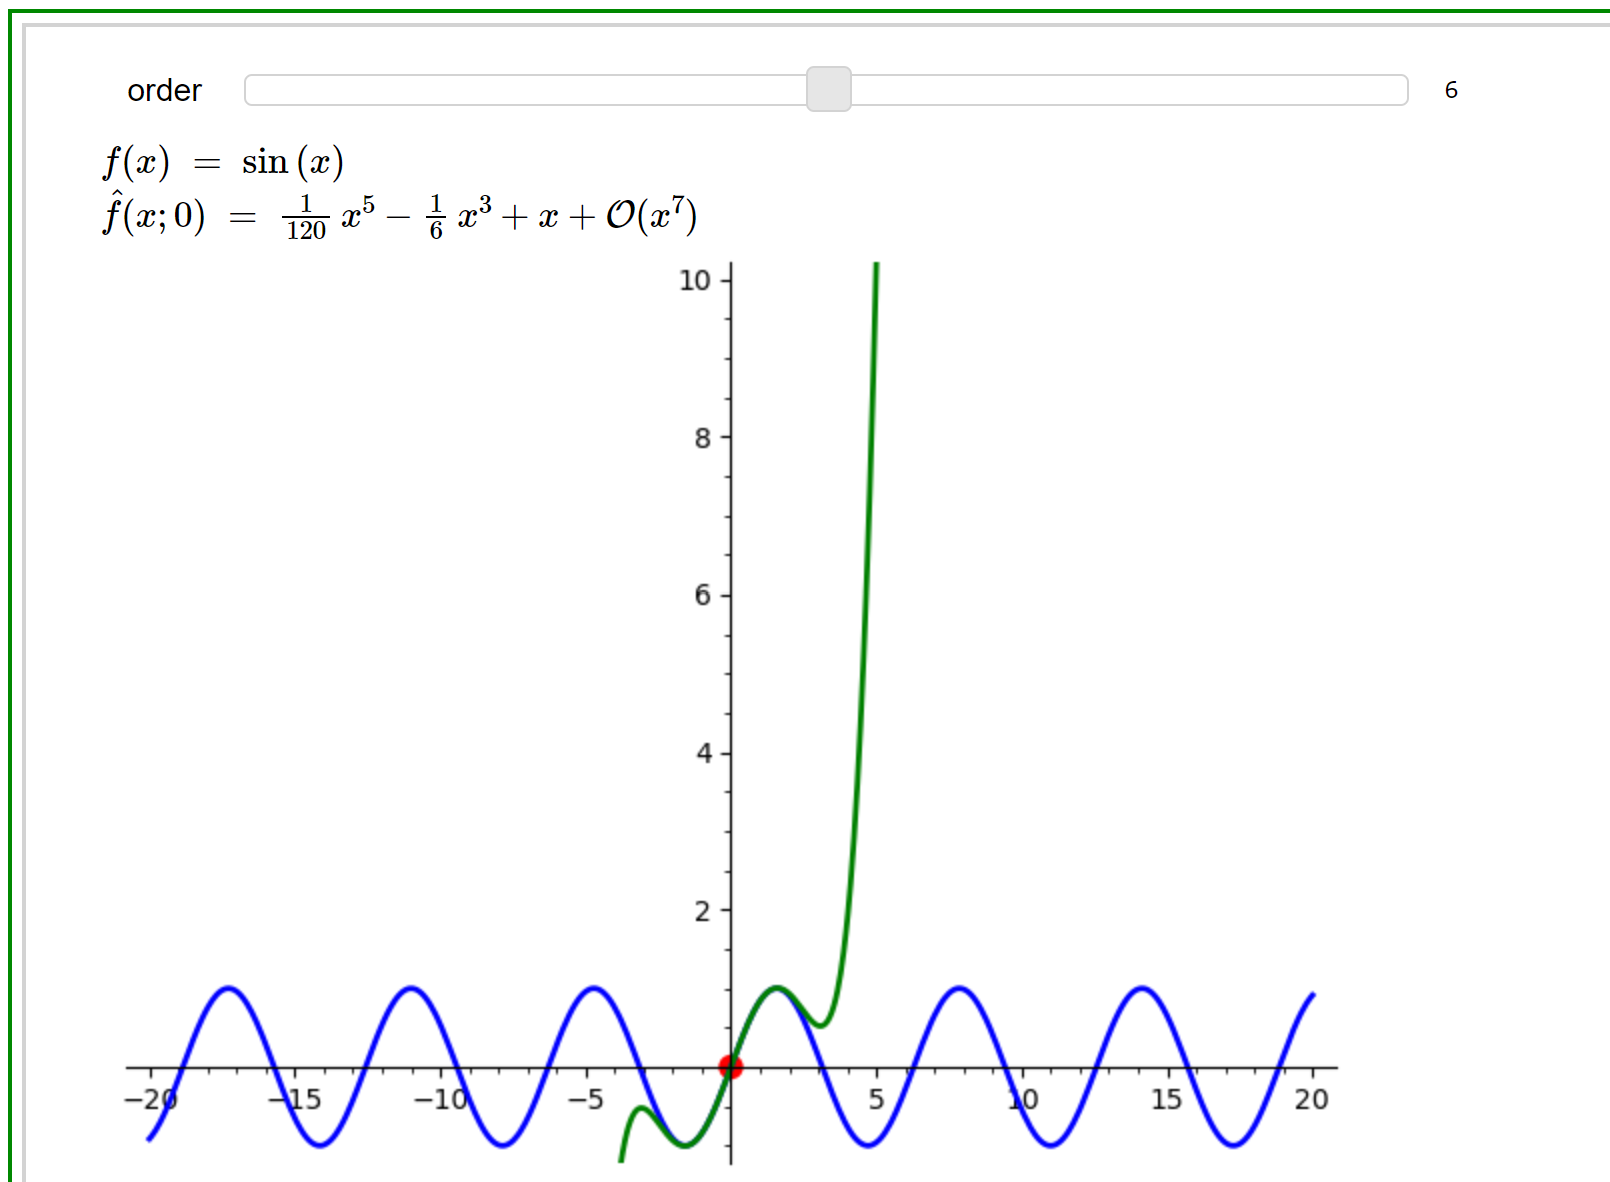

Animate code in Sagemath for $e^x$
```python
# Animate  Taylor Series of $$f(x) = sin(x)$$
# MCS 320: Introduction to Symbolic Computation - Jan Verschelde, Mathematics, U. Illinois at Chicago  –
# http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec27.html#
x   = SR.var('x')
x0  = 0
f   = sin(x)
p   = plot(f, -3, 3, thickness=2,legend_label='f(x) = e^x')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -3,3, color='green', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(60)]
a = animate(frames, ymin=-10, ymax=10)
a.show()
a.save('sin_x_taylor_animation_1.gif')
```

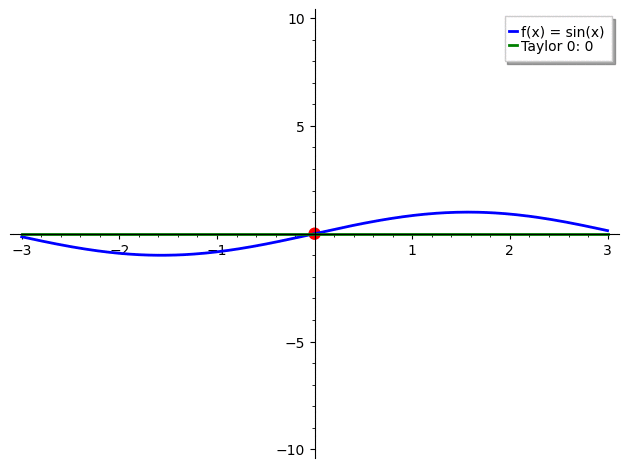

#What is value of the partial Taylor series of $sin(x)$ up to the  $10$-th term of $sin(x)$ about $0$ (Maclaurin  series) for $x=2$

$$ sin(x) \approx \sum_{i=0}^{\infty} \frac{(-1)^i x^{2i+1}}{2i + 1!}  = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

In [303]:
# ∑_{i=0}^n  (-1)^i x^(2i+1)/(2i + 1)!

import math

n = 10
x = 2
sin_x = 0

for i in range(n+1):
    sin_x += (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
    print(i, 'sin_x ≈ ∑_{i=0}^'+str(i),'(-1)^i x^(2i+1)/(2i + 1)!! =',sin_x)  
    
print('sin(x) = ',math.sin(x))

0 sin_x ≈ ∑_{i=0}^0 (-1)^i x^(2i+1)/(2i + 1)!! = 2.0
1 sin_x ≈ ∑_{i=0}^1 (-1)^i x^(2i+1)/(2i + 1)!! = 0.6666666666666667
2 sin_x ≈ ∑_{i=0}^2 (-1)^i x^(2i+1)/(2i + 1)!! = 0.9333333333333333
3 sin_x ≈ ∑_{i=0}^3 (-1)^i x^(2i+1)/(2i + 1)!! = 0.9079365079365079
4 sin_x ≈ ∑_{i=0}^4 (-1)^i x^(2i+1)/(2i + 1)!! = 0.909347442680776
5 sin_x ≈ ∑_{i=0}^5 (-1)^i x^(2i+1)/(2i + 1)!! = 0.9092961359628027
6 sin_x ≈ ∑_{i=0}^6 (-1)^i x^(2i+1)/(2i + 1)!! = 0.9092974515196738
7 sin_x ≈ ∑_{i=0}^7 (-1)^i x^(2i+1)/(2i + 1)!! = 0.9092974264614476
8 sin_x ≈ ∑_{i=0}^8 (-1)^i x^(2i+1)/(2i + 1)!! = 0.909297426829951
9 sin_x ≈ ∑_{i=0}^9 (-1)^i x^(2i+1)/(2i + 1)!! = 0.909297426825641
10 sin_x ≈ ∑_{i=0}^10 (-1)^i x^(2i+1)/(2i + 1)!! = 0.909297426825682
sin(x) =  0.9092974268256817


# What is the minimun $n$ for which the error between the Taylor series for $sin(x)$ about $0$ (Maclaurin  series) for $x$ and *math.sin(x)*, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\sum_{i=0}^{\infty} \frac{(-1)^i x^{2i+1}}{2i + 1!} - math.sin(x) \right| < \epsilon$$

In [304]:
# Returns Min n, |∑_{i=1}^{n}  (-1)^i x^(2i+1)/(2i + 1)! - math.sin(x)| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!   
import math

x = 4
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(20)," ","delta = (-1)^i x^(2i+1)/(2i + 1)! ".center(20)," ","error".center(14)," ","epsilon".center(11))
error = 1
i = 0

while  epsilon <= error:
  delta =  (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =", i-1) 
print("x =", x) 
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ', math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!   delta = (-1)^i x^(2i+1)/(2i + 1)!        error          epsilon  
         0    4.000000000000000000    4.00000000000000000   4.75680249530792842    1e-05
         1    -6.666666666666666075    -10.66666666666666607   5.90986417135873765    1e-05
         2    1.866666666666667140    8.53333333333333321   2.62346916197459556    1e-05
         3    -1.384126984126983650    -3.25079365079365079   0.62732448881905545    1e-05
         4    -0.661728395061727870    0.72239858906525578   0.09507410024620033    1e-05
         5    -0.766804553471219563    -0.10507615840949175   0.01000205816329136    1e-05
         6    -0.756027511583066580    0.01077704188815300   0.00077498372486162    1e-05
         7    -0.756848619536449663    -0.00082110795338309   0.00004612422852146    1e-05
         8    -0.756800319068603566    0.00004830046784606   0.00000217623932464    1e-05
n = 8
x = 4
sin_x ≈ ∑_{i=0}^8 (-1)^i x^(2i+1)/(2i + 1)! = -0.756800319

In [305]:
# Returns Min n, |∑_{i=1}^{n}  (-1)^i x^(2i+1)/(2i + 1)! - math.sin(x)| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!   
import math

x = -4
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(21)," ","delta = (-1)^i x^(2i+1)/(2i + 1)!".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 0
while  epsilon <= error:
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =", i-1) 
print("x =", x) 
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ', math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!   delta = (-1)^i x^(2i+1)/(2i + 1)!       error              epsilon       
         0    -4.000000000000000000    -4.00000000000000000   4.75680249530792842    1e-05
         1    6.666666666666666075    10.66666666666666607   5.90986417135873765    1e-05
         2    -1.866666666666667140    -8.53333333333333321   2.62346916197459556    1e-05
         3    1.384126984126983650    3.25079365079365079   0.62732448881905545    1e-05
         4    0.661728395061727870    -0.72239858906525578   0.09507410024620033    1e-05
         5    0.766804553471219563    0.10507615840949175   0.01000205816329136    1e-05
         6    0.756027511583066580    -0.01077704188815300   0.00077498372486162    1e-05
         7    0.756848619536449663    0.00082110795338309   0.00004612422852146    1e-05
         8    0.756800319068603566    -0.00004830046784606   0.00000217623932464    1e-05
n = 8
x = -4
sin_x ≈ ∑_{i=0}^8 (-1)^i x^(2i+1)/(2i + 1)! = 0.75680

# What is the minimun $n$ for which the $n$-th term of the Taylor series for $sin(x)$ about $0$ (Maclaurin  series) for $x$, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\frac{x^{2n + 1}}{2n + 1!}\right| < \epsilon$$

In [306]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!
import math

x = 1
epsilon = 10**(-5)

sin_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(20)," "," delta = x^(2n + 1)/(2n + 1)!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i + 1

print("n = ", i - 1) 
print('x = ', x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =',sin_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!    delta = x^(2n + 1)/(2n + 1)!    epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    0.83333333333333337    -0.16666666666666666    1e-05
         2    0.84166666666666667    0.00833333333333333    1e-05
         3    0.84146825396825398    -0.00019841269841270    1e-05
         4    0.84147100970017641    0.00000275573192240    1e-05
n =  4
x =  1
sin_x ≈ ∑_{i=0}^4 (-1)^i x^(2i+1)/(2i + 1)! = 0.8414710097001764
epsilon = 1e-05
math.sin(x) =  0.8414709848078965


In [307]:
# Returns Min n, c < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!
import math

x = -1
epsilon = 10**(-5)

sin_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(20)," "," delta = x^{2n + 1}/{2n + 1!}".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ",i-1) 
print('x = ',x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =',sin_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!    delta = x^{2n + 1}/{2n + 1!}    epsilon 
         0    -1.00000000000000000    -1.00000000000000000    1e-05
         1    -0.83333333333333337    0.16666666666666666    1e-05
         2    -0.84166666666666667    -0.00833333333333333    1e-05
         3    -0.84146825396825398    0.00019841269841270    1e-05
         4    -0.84147100970017641    -0.00000275573192240    1e-05
n =  4
x =  -1
sin_x ≈ ∑_{i=0}^4 (-1)^i x^(2i+1)/(2i + 1)! = -0.8414710097001764
epsilon = 1e-05
math.sin(x) =  -0.8414709848078965


In [308]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!
import math

x = 4
epsilon = 10**(-5)

sin_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(20)," "," delta= x^{2n + 1}/{2n + 1!}".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ", i-1) 
print('x = ', x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ', math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!    delta= x^{2n + 1}/{2n + 1!}    epsilon 
         0    4.00000000000000000    4.00000000000000000    1e-05
         1    -6.66666666666666607    -10.66666666666666607    1e-05
         2    1.86666666666666714    8.53333333333333321    1e-05
         3    -1.38412698412698365    -3.25079365079365079    1e-05
         4    -0.66172839506172787    0.72239858906525578    1e-05
         5    -0.76680455347121956    -0.10507615840949175    1e-05
         6    -0.75602751158306658    0.01077704188815300    1e-05
         7    -0.75684861953644966    -0.00082110795338309    1e-05
         8    -0.75680031906860357    0.00004830046784606    1e-05
         9    -0.75680257873961387    -0.00000225967101034    1e-05
n =  9
x =  4
sin_x ≈ ∑_{i=0}^9 (-1)^i x^(2i+1)/(2i + 1)! = -0.7568025787396139
epsilon = 1e-05
math.sin(x) =  -0.7568024953079282


In [309]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!
import math

x = -4
epsilon = 10**(-5)

sin_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(20)," "," delta = x^{2n + 1}/{2n + 1!}".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ", i-1) 
print('x = ', x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ', math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!    delta = x^{2n + 1}/{2n + 1!}    epsilon 
         0    -4.00000000000000000    -4.00000000000000000    1e-05
         1    6.66666666666666607    10.66666666666666607    1e-05
         2    -1.86666666666666714    -8.53333333333333321    1e-05
         3    1.38412698412698365    3.25079365079365079    1e-05
         4    0.66172839506172787    -0.72239858906525578    1e-05
         5    0.76680455347121956    0.10507615840949175    1e-05
         6    0.75602751158306658    -0.01077704188815300    1e-05
         7    0.75684861953644966    0.00082110795338309    1e-05
         8    0.75680031906860357    -0.00004830046784606    1e-05
         9    0.75680257873961387    0.00000225967101034    1e-05
n =  9
x =  -4
sin_x ≈ ∑_{i=0}^9 (-1)^i x^(2i+1)/(2i + 1)! = 0.7568025787396139
epsilon = 1e-05
math.sin(x) =  0.7568024953079282


In [310]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!

import math

x = -9
epsilon = 10**(-5)

sin_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(20)," "," delta=x^{2n + 1}/{2n + 1!}".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ", i-1) 
print('x = ', x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ', math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!    delta=x^{2n + 1}/{2n + 1!}    epsilon 
         0    -9.00000000000000000    -9.00000000000000000    1e-05
         1    112.50000000000000000    121.50000000000000000    1e-05
         2    -379.57499999999998863    -492.07499999999998863    1e-05
         3    569.42678571428564283    949.00178571428568830    1e-05
         4    -498.20022321428587020    -1067.62700892857151302    1e-05
         5    287.96148336038947946    786.16170657467534966    1e-05
         6    -120.23786428415348837    -408.19934764454296783    1e-05
         7    37.21045552159878866    157.44831980575227703    1e-05
         8    -9.67672794996715169    -46.88718347156594035    1e-05
         9    1.42813129329846511    11.10485924326561680    1e-05
        10    -0.71352013218847521    -2.14165142548694032    1e-05
        11    -0.37068660360262112    0.34283352858585409    1e-05
        12    -0.41696912996171143    -0.04628252635909030    1e-05
      

In [311]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!

import math

x = -10 
epsilon = 10**(-5)

delta = 1
sin_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(20)," "," delta=x^{2n + 1}/{2n + 1!}".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ", i-1) 
print('x = ', x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ', math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!    delta=x^{2n + 1}/{2n + 1!}    epsilon 
         0    -10.00000000000000000    -10.00000000000000000    1e-05
         1    156.66666666666665719    166.66666666666665719    1e-05
         2    -676.66666666666674246    -833.33333333333337123    1e-05
         3    1307.46031746031735565    1984.12698412698409811    1e-05
         4    -1448.27160493827182108    -2755.73192239858917674    1e-05
         5    1056.93923360590019911    2505.21083854417202019    1e-05
         6    -548.96515007626135230    -1605.90438368216155141    1e-05
         7    215.75122310572032802    764.71637318198168032    1e-05
         8    -65.39450232883172021    -281.14572543455204823    1e-05
         9    16.81185013741158230    82.20635246624330250    1e-05
        10    -2.76109092597967987    -19.57294106339126216    1e-05
        11    1.10707924465100405    3.86817017063068391    1e-05
        12    0.46238421621255665    -0.64469502843844739    1

In [312]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!

import math

x = -35
epsilon = 10**(-5)

delta = 1
sin_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(20)," "," delta=x^{2n + 1}/{2n + 1!}".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ", i-1) 
print('x = ', x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ', math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!    delta=x^{2n + 1}/{2n + 1!}    epsilon 
         0    -35.00000000000000000    -35.00000000000000000    1e-05
         1    7110.83333333333303017    7145.83333333333303017    1e-05
         2    -430571.45833333337213844    -437682.29166666668606922    1e-05
         3    12335162.04861111007630825    12765733.50694444403052330    1e-05
         4    -204859609.42370757460594177    -217194771.47231867909431458    1e-05
         5    2213900345.60893249511718750    2418759955.03263998031616211    1e-05
         6    -16779567249.99993896484375000    -18993467595.60887145996093750    1e-05
         7    94015660391.05180358886718750    110795227641.05174255371093750    1e-05
         8    -404970199389.42016601562500000    -498985859780.47198486328125000    1e-05
         9    1382332953333.03076171875000000    1787303152722.45092773437500000    1e-05
        10    -3830634575440.78466796875000000    -5212967528773.81542968750000000    

In [313]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!

import math

x = -43 
epsilon = 10**(-5)

delta = 1
sin_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(20)," "," delta=x^{2n + 1}/{2n + 1!}".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ", i-1) 
print('x = ', x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ', math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!    delta=x^{2n + 1}/{2n + 1!}    epsilon 
         0    -43.00000000000000000    -43.00000000000000000    1e-05
         1    13208.16666666666606034    13251.16666666666606034    1e-05
         2    -1211862.19166666665114462    -1225070.35833333339542150    1e-05
         3    52720401.91686507314443588    53932264.10853174328804016    1e-05
         4    -1332290102.75917935371398926    -1385010504.67604446411132812    1e-05
         5    21948477380.38633346557617188    23280767483.14551162719726562    1e-05
         6    -253988311570.48580932617187500    -275936788950.87213134765625000    1e-05
         7    2175569415906.47851562500000000    2429557727476.96435546875000000    1e-05
         8    -14340063812420.38671875000000000    -16515633228326.86523437500000000    1e-05
         9    74950596536048.53125000000000000    89290660348468.92187500000000000    1e-05
        10    -318140905807568.25000000000000000    -39309150234361

#  Solution for $|x|$ more than 35
**Solution** for $sin(x)$ calculate radians $x = x * pi/180;$ and return $sin(x)$

In [314]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!

import math

x = -43
epsilon = 10**(-5)

xo = x 

x = x * math.pi/180; # radians

delta = 1
sin_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!".center(20)," "," delta=x^{2n + 1}/{2n + 1!}".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ", i-1) 
print('x = ', xo)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ', math.sin(x))

         n   ∑_{i=0}^n (-1)^i x^(2i+1)/(2i + 1)!    delta=x^{2n + 1}/{2n + 1!}    epsilon 
         0    -0.75049157835756164    -0.75049157835756164    1e-05
         1    -0.68004073130621856    0.07045084705134308    1e-05
         2    -0.68202475963913356    -0.00198402833291503    1e-05
         3    -0.68199815298735289    0.00002660665178066    1e-05
         4    -0.68199836112439371    -0.00000020813704080    1e-05
n =  4
x =  -43
sin_x ≈ ∑_{i=0}^4 (-1)^i x^(2i+1)/(2i + 1)! = -0.6819983611243937
epsilon = 1e-05
math.sin(x) =  -0.6819983600624985


# Efficeincy 
Efficient 

https://stackoverflow.com/questions/69978341/error-of-taylor-series-ex-for-negative-x

$$ 
\begin{array}{lll}
sin(x)  \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots + \frac{x^{2n + 1}}{2n + 1!}   \\
        & = x - \frac{x^3}{3!} + \frac{x^5}{5!} -\cdots+ \frac{x^n}{n!}; n (mod 2)!= 0 \\
       & = \left[ 1  * \frac{x}{1} \right]  - \left[ \left( 1 *  \frac{x}{1} \frac{x}{2} \right) * \frac{x}{3} \right]+\left[  \left(1 *  \frac{x}{1} \frac{x}{2}   \frac{x}{3}  \frac{x}{4}\right) * \frac{x}{5}\right]  - \left[  \left(1 *  \frac{x}{1} \frac{x}{2}   \frac{x}{3} \frac{x}{5} \frac{x}{6}\right) * \frac{x}{7} \right]  +\cdots+ \left[  \left(1 *  \frac{x}{1}  \frac{x}{2} \cdots  \frac{x}{n-1} \right)* \frac{x}{n} \right] \ \ \text{ efficient}
\end{array} 
$$













Additions
$$ n \text{ additions } $$

Multiplications
$$ n \text{ multiplications } $$

Divisions
$$ n \text{ divsions }$$ 

TOTAL 
$$ 3n = \Theta(n) \text{ FLOPS }$$ 

In [315]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!
import math
import time

start = time.time()

x = 700
x = x * math.pi/180; # radians
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
sin_x = 0
i = 1
cont = 0
while  epsilon <= abs(delta): 
  delta *= x/i 
  if i%2 != 0:
    sin_x += ((-1)**cont)*(delta)
    cont += 1
  i = i+1

if x != xo: 
  sin_x = sin_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x, "; i mod2 != 0")
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ', math.sin(x))
print('time = ',end - start)

n =  65
x =  12.217304763960305
sin_x ≈ ∑_{i=0}^65 (-1)^i x^(2i+1)/(2i + 1)! = -0.34202014332683567 ; i mod2 != 0
epsilon = 1e-20
math.sin(x) =  -0.3420201433256705
time =  0.0003826618194580078


In [316]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!

import time

start = time.time()

x = -700
x = x * math.pi/180; # radians
epsilon = 10**(-20)

neg = False
if x < 0 :
  x = abs(x)
  neg = True

delta = 1
sin_x = 0
i = 1
cont = 0
while  epsilon <= abs(delta): 
  delta *= x/i 
  if i%2 != 0:
    sin_x += ((-1)**cont)*(delta)
    cont += 1
  i = i+1

if x != xo: 
  sin_x = sin_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x, "; i mod2 != 0")
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))
print('time = ',end - start)

n =  65
x =  12.217304763960305
sin_x ≈ ∑_{i=0}^65 (-1)^i x^(2i+1)/(2i + 1)! = -0.34202014332683567 ; i mod2 != 0
epsilon = 1e-20
math.sin(x) =  -0.3420201433256705
time =  0.0004100799560546875


Inefficient

$$ sin({ x}) \approx \sum_{i=0}^{n} \frac{x^{2n + 1}}{2n + 1!}  =\sum_{i=0}^{n} (-1^{i}) \frac{x**i}{math.factorial(i)}; i(mod2)!=0$$

Additions
$$ n \text{ additions } $$

Multiplications

* Powers - exponentiation by squaring
$$ x^i = x**i$$

<center>
<a href="https://en.wikipedia.org/wiki/Exponentiation_by_squaring">https://en.wikipedia.org/wiki/Exponentiation_by_squaring</a>
</center>
$$\lg i \text{ multiplications }$$
<center>
<a href="https://math.stackexchange.com/questions/228744/value-of-summation-of-logn">https://math.stackexchange.com/questions/228744/value-of-summation-of-logn</a>
</center>
$$ \sum_{i=1}^{n}\lg i \approx  n \lg n$$ 


* Factorials
$$math.factorial(i), $$
$$  i-1 \text{ mutiplications }  $$
$$ \sum_{i=1}^{n} i-1 = \frac{n(n-1)}{2} =  \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

Divisions
$$ n-1 \text{ divsions }$$ 

TOTAL 
$$ \frac{1}{2} n^2 + n \lg n + \frac{3}{2} n -1 = \Theta(n^2) \text{ FLOPS }$$ 

In [317]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!

import math
import time

start = time.time()

x = 700
x = x * math.pi/180; # radians
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
sin_x = 0
i = 1
cont = 0

while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  #print(delta)
  if i%2 != 0:
    sin_x += ((-1)**cont)*delta
    cont += 1
  i = i+1

if x != xo: 
  sin_x = 1 / sin_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x, "; i mod2 != 0")
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ', math.sin(x))
print('time = ',end - start)

n =  65
x =  12.217304763960305
sin_x ≈ ∑_{i=0}^65 (-1)^i x^(2i+1)/(2i + 1)! = -0.3420201433244739 ; i mod2 != 0
epsilon = 1e-20
math.sin(x) =  -0.3420201433256705
time =  0.0008516311645507812


Inefficient

$$ sin({ x}) \approx \sum_{i=0}^{n} \frac{x^{2n + 1}}{2n + 1!}  =  \sum_{i=1}^{n} \frac{\overset{i\ times}{x*x*\cdots*x}}{1*2*\cdots*i}; i(mod2)!=0$$

> Indented block



Additions
$$ n \text{ additions } $$

Multiplications

* Powers
$$ \overset{i\ times}{x*x*\cdots*x}$$
$$i-1 \text{ multiplications }$$
$$ \sum_{i=1}^{n}\ i-1 = \frac{n(n-1)}{2} = \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

* Factorials
$$1*2*\cdots*i$$
$$  i-1 \text{ mutiplications }  $$
$$ \sum_{i=1}^{n} i-1 = \frac{n(n-1)}{2} = \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

Divisions
$$ n-1 \text{ divsions }$$ 

TOTAL 
$$ n^2  + n -1  = \Theta(n^2) \text{ FLOPS }$$ 

In [318]:
# Returns Min n, |x^{2n + 1}/{2n + 1!}| < epsilon and ∑_{i=0}^{n} (-1)^i x^(2i+1)/(2i + 1)!

import time

start = time.time()

x = 700
x = x * math.pi/180; # radians
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
sin_x = 0
i = 1
cont = 0
while  epsilon <= abs(delta):
  
  x_to_i = 1
  fact_of_i = 1
  for k in range(1,i+1):
      x_to_i *= x
      fact_of_i *= k

  delta = x_to_i/fact_of_i 
  if i%2 != 0:
    sin_x += ((-1)**cont)*delta
    cont += 1
  i = i+1

if x != xo: 
  sin_x = 1 / sin_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x, "; i mod2 != 0")
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ', math.sin(x))
print('time = ',end - start)

n =  65
x =  12.217304763960305
sin_x ≈ ∑_{i=0}^65 (-1)^i x^(2i+1)/(2i + 1)! = -0.3420201433228712 ; i mod2 != 0
epsilon = 1e-20
math.sin(x) =  -0.3420201433256705
time =  0.0022339820861816406


# Error using the Lagrange's formula of the Residual $E_n$

* Form: Numerical Analysis Mathematics of Scientific Computing David Kincaid and Ward Cheney and Error estimates in Taylor approximations https://math.dartmouth.edu/~m8s17/ErrorEstimates.pdf

## Lagrange's formula of the Residual
For the Taylor series for $f(x)$

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \text{ for }  \xi \text{ between } c \text{ and } x $$

If you can find a positive real number $M$such that 
$$\left|f^{(n+1)}(\xi)\right|  \le M \text{ for }  \xi \text{ between } c \text{ and } x $$ for all
 then Lagrange’s formula tells you
that
$$ \left| E_n \right| \le  \frac{M}{(n+1)!}
\left|x − c\right|^{(n+1)} $$

For the Taylor series for $f(x) = sin(x)$ about $c=0$ (Maclaurin) 

* If $x \ge 0$ then $f(n+1)(ξ)= e^ξ < sin(x)$ for any $0 \le \xi \le x$ then 

$$ \left|E_n \right| =  \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{sin(x)}{(n+1)!}x^{(n+1)} \right| \le \left| \frac{sin(x)}{(n+1)!}x^{(n+1)} \right| $$





<center>
<img src = "https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_epsilon.png" alt = "e_to_minus_epsilon.png]">  </img>
</center>

* If $x \le 0$ then $f(n+1)(ξ)= e^ξ < e^0  = 1$ for any $x \le \xi < 0$ then 

$$ \left|E_n =\right| = \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{e^\xi}{(n+1)!}x^{(n+1)} \right| \le  \left|\frac{1}{(n+1)!}x^{(n+1)}\right| $$

<center>
<img src = "https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_minus_epsilon.png" alt = "e_to_minus_epsilon.png]">  </img>
</center>



# What is the minimun $n$ for which the error using absolute value of the Lagrange's formula of the Residual $|E_n|$, of the Taylor series for $e^x$ about $0$ (Maclaurin  series), is less than  $\epsilon$.

$$ \min_{n \in \mathbb{N}}|E_n|  < \epsilon $$

this is

$$\min_{n \in \mathbb{N}}\left\{ \left|\frac{sin(x)}{(n+1)!}x^{(n+1)} \right| \right\} < \epsilon \text{ if }  x \ge 0$$

and

$$\min_{n \in \mathbb{N}}\left\{  \left|\frac{1}{(n+1)!}x^{(n+1)} \right| \right\} < \epsilon \text{ if }  x < 0$$
 

In [319]:
# Returns Min n, |Lagrange_Residual_n| < epsilon and ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)!

import math

x = 4
x = x * math.pi/180; # radians
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^'(-1)^i x^(2i+1)/(2i + 1)!, imod2!=0'".center(21)," ","|Lagrange_Residual_n|".center(20)," ","epsilon".center(20))
error = 1
i = 0
cont = 0
while  epsilon <= abs(error):
  delta = x**i/math.factorial(i) 
  #print(delta)
  if i%2 != 0:
    sin_x += ((-1)**cont)*delta
    cont += 1
  if ( x >= 0 ):
     error = math.sin(x) * x**(i+1)/ math.factorial(i+1) 
  else:
     error = x**(i+1)/ math.factorial(i+1)
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"        ",format(error, '.17f'),"        ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x, "; i mod2 != 0")
print("epsilon =","{:.0e}".format(epsilon))   
print('math.sin_x = ',math.sin(x))

         n   ∑_{i=0}^'(-1)^i x^(2i+1)/(2i + 1)!, imod2!=0'   |Lagrange_Residual_n|         epsilon       
         0    0.00000000000000000          0.00486992056566385          1e-05
         1    0.06981317007977318          0.00016999229636284          1e-05
         2    0.06981317007977318          0.00000395590036608          1e-05
n =  2
x =  0.06981317007977318
sin_x ≈ ∑_{i=0}^2 (-1)^i x^(2i+1)/(2i + 1)! = 0.06981317007977318 ; i mod2 != 0
epsilon = 1e-05
math.sin_x =  0.0697564737441253


In [320]:
# Returns Min n, |Lagrange_Residual_n| < epsilon and ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)!

import math

x = -4
x = x * math.pi/180; # radians
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^'(-1)^i x^(2i+1)/(2i + 1)!, imod2!=0'".center(21)," ","|Lagrange_Residual_n|".center(20)," ","epsilon".center(20))
error = 1
i = 0
cont = 0
while  epsilon <= abs(error):
  delta = (((-1)**i) * x**(2*i + 1))/math.factorial(2*i + 1) 
  sin_x += delta
  if ( x >= 0 ):
     error = math.sin(x) * x**(i+1)/ math.factorial(i+1) 
  else:
     error = x**(i+1)/ math.factorial(i+1)
  print(format(i, '10'),"  ", format(sin_x, '.17f'),"        ",format(error, '.17f'),"        ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'(-1)^i x^(2i+1)/(2i + 1)! =', sin_x)
print("epsilon =","{:.0e}".format(epsilon))   
print('math.sin_x = ',math.sin(x))

         n   ∑_{i=0}^'(-1)^i x^(2i+1)/(2i + 1)!, imod2!=0'   |Lagrange_Residual_n|         epsilon       
         0    -0.06981317007977318          -0.06981317007977318          1e-05
         1    -0.06975645992580830          0.00243693935829367          1e-05
         2    -0.06975647374572892          -0.00005671015396488          1e-05
         3    -0.06975647374412519          0.00000098977890600          1e-05
n =  3
x =  -0.06981317007977318
sin_x ≈ ∑_{i=0}^3 (-1)^i x^(2i+1)/(2i + 1)! = -0.06975647374412519
epsilon = 1e-05
math.sin_x =  -0.0697564737441253


#  Sympy

Taylor Series Expansion with Python from Data Science Fabric

https://dsfabric.org/taylor-series-expansion-with-python

In [321]:
from sympy import series, Symbol, pi, E, N, sin
from sympy.plotting import plot
import matplotlib.pyplot as plt

In [322]:
# Define symbol
x = Symbol('x')

In [323]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n)

In [324]:
print('sin(x)  ≅')
taylor(sin(x), 0, 8)

sin(x)  ≅


x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)

In [325]:
print('sin(x) ≅', taylor(sin(x), 0, 8))

sin(x) ≅ x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)


In [326]:
print('sin(x) ≅ at around 1')
taylor(sin(x), 1, 8)

sin(x) ≅ at around 1


sin(1) + (x - 1)*cos(1) - (x - 1)**2*sin(1)/2 - (x - 1)**3*cos(1)/6 + (x - 1)**4*sin(1)/24 + (x - 1)**5*cos(1)/120 - (x - 1)**6*sin(1)/720 - (x - 1)**7*cos(1)/5040 + O((x - 1)**8, (x, 1))

In [327]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))

sin(1) = O(1)


In [328]:
print('sin(1) =', N(taylor(sin(x), 0, 4).subs(x,1)))

sin(1) = O(1)


In [329]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8))

Taylor 0 sin(x) ≅ O(1)
Taylor 1 sin(x) ≅ O(x)
Taylor 2 sin(x) ≅ x + O(x**2)
Taylor 3 sin(x) ≅ x + O(x**3)
Taylor 4 sin(x) ≅ x - x**3/6 + O(x**4)
Taylor 5 sin(x) ≅ x - x**3/6 + O(x**5)
Taylor 6 sin(x) ≅ x - x**3/6 + x**5/120 + O(x**6)
Taylor 7 sin(x) ≅ x - x**3/6 + x**5/120 + O(x**7)
Taylor 8 sin(x) ≅ x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)


In [330]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0).subs(x,1))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1).subs(x,1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2).subs(x,1))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3).subs(x,1))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4).subs(x,1))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5).subs(x,1))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6).subs(x,1))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7).subs(x,1))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8).subs(x,1))

Taylor 0 sin(x) ≅ O(1)
Taylor 1 sin(x) ≅ O(1)
Taylor 2 sin(x) ≅ O(1)
Taylor 3 sin(x) ≅ O(1)
Taylor 4 sin(x) ≅ O(1)
Taylor 5 sin(x) ≅ O(1)
Taylor 6 sin(x) ≅ O(1)
Taylor 7 sin(x) ≅ O(1)
Taylor 8 sin(x) ≅ O(1)


In [331]:
print('Taylor 0 sin(x) ≅', N(taylor(sin(x), 0, 0).subs(x,1)))
print('Taylor 1 sin(x) ≅', N(taylor(sin(x), 0, 1).subs(x,1)))
print('Taylor 2 sin(x) ≅', N(taylor(sin(x), 0, 2).subs(x,1)))
print('Taylor 3 sin(x) ≅', N(taylor(sin(x), 0, 3).subs(x,1)))
print('Taylor 4 sin(x) ≅', N(taylor(sin(x), 0, 4).subs(x,1)))
print('Taylor 5 sin(x) ≅', N(taylor(sin(x), 0, 5).subs(x,1)))
print('Taylor 6 sin(x) ≅', N(taylor(sin(x), 0, 6).subs(x,1)))
print('Taylor 7 sin(x) ≅', N(taylor(sin(x), 0, 7).subs(x,1)))
print('Taylor 8 sin(x) ≅', N(taylor(sin(x), 0, 8).subs(x,1)))

Taylor 0 sin(x) ≅ O(1)
Taylor 1 sin(x) ≅ O(1)
Taylor 2 sin(x) ≅ O(1)
Taylor 3 sin(x) ≅ O(1)
Taylor 4 sin(x) ≅ O(1)
Taylor 5 sin(x) ≅ O(1)
Taylor 6 sin(x) ≅ O(1)
Taylor 7 sin(x) ≅ O(1)
Taylor 8 sin(x) ≅ O(1)


In [332]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [333]:
print('sin(x)  ≅')
taylor(sin(x), 0, 8)

sin(x)  ≅


-x**7/5040 + x**5/120 - x**3/6 + x

In [334]:
print('sin(x) ≅', taylor(sin(x), 0, 8))

sin(x) ≅ -x**7/5040 + x**5/120 - x**3/6 + x


In [335]:
print('sin(x) ≅ at around 1')
taylor(sin(x), 1, 8)

sin(x) ≅ at around 1


-(x - 1)**7*cos(1)/5040 - (x - 1)**6*sin(1)/720 + (x - 1)**5*cos(1)/120 + (x - 1)**4*sin(1)/24 - (x - 1)**3*cos(1)/6 - (x - 1)**2*sin(1)/2 + (x - 1)*cos(1) + sin(1)

In [336]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))

sin(1) = 5/6


In [337]:
print('sin(1) =', N(taylor(sin(x), 0, 4).subs(x,1)))

sin(1) = 0.833333333333333


In [338]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ x
Taylor 3 sin(x) ≅ x
Taylor 4 sin(x) ≅ -x**3/6 + x
Taylor 5 sin(x) ≅ -x**3/6 + x
Taylor 6 sin(x) ≅ x**5/120 - x**3/6 + x
Taylor 7 sin(x) ≅ x**5/120 - x**3/6 + x
Taylor 8 sin(x) ≅ -x**7/5040 + x**5/120 - x**3/6 + x


In [339]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0).subs(x,1))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1).subs(x,1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2).subs(x,1))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3).subs(x,1))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4).subs(x,1))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5).subs(x,1))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6).subs(x,1))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7).subs(x,1))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8).subs(x,1))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ 1
Taylor 3 sin(x) ≅ 1
Taylor 4 sin(x) ≅ 5/6
Taylor 5 sin(x) ≅ 5/6
Taylor 6 sin(x) ≅ 101/120
Taylor 7 sin(x) ≅ 101/120
Taylor 8 sin(x) ≅ 4241/5040


In [340]:
print('Taylor 0 sin(x) ≅', N(taylor(sin(x), 0, 0).subs(x,1)))
print('Taylor 1 sin(x) ≅', N(taylor(sin(x), 0, 1).subs(x,1)))
print('Taylor 2 sin(x) ≅', N(taylor(sin(x), 0, 2).subs(x,1)))
print('Taylor 3 sin(x) ≅', N(taylor(sin(x), 0, 3).subs(x,1)))
print('Taylor 4 sin(x) ≅', N(taylor(sin(x), 0, 4).subs(x,1)))
print('Taylor 5 sin(x) ≅', N(taylor(sin(x), 0, 5).subs(x,1)))
print('Taylor 6 sin(x) ≅', N(taylor(sin(x), 0, 6).subs(x,1)))
print('Taylor 7 sin(x) ≅', N(taylor(sin(x), 0, 7).subs(x,1)))
print('Taylor 8 sin(x) ≅', N(taylor(sin(x), 0, 8).subs(x,1)))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ 1.00000000000000
Taylor 3 sin(x) ≅ 1.00000000000000
Taylor 4 sin(x) ≅ 0.833333333333333
Taylor 5 sin(x) ≅ 0.833333333333333
Taylor 6 sin(x) ≅ 0.841666666666667
Taylor 7 sin(x) ≅ 0.841666666666667
Taylor 8 sin(x) ≅ 0.841468253968254


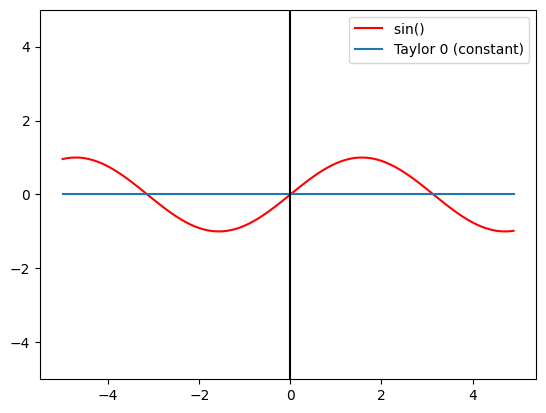

In [341]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin1 = [taylor(sin(x), 0, 1).subs(x,v) for v in values]
legends = ['sin() ','Taylor 0 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin1)

ax.set_ylim([-5,5])
#ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)


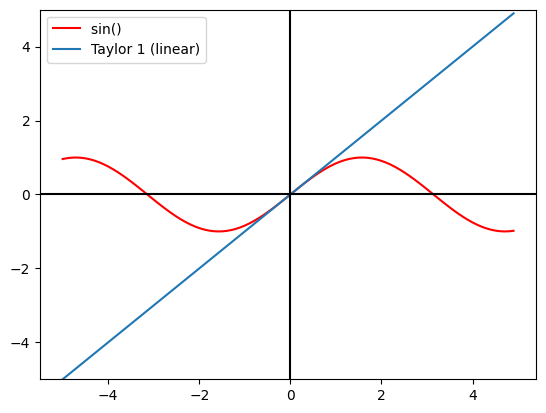

In [342]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin2 = [taylor(sin(x), 0, 2).subs(x,v) for v in values]
legends = ['sin() ','Taylor 1 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin2)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

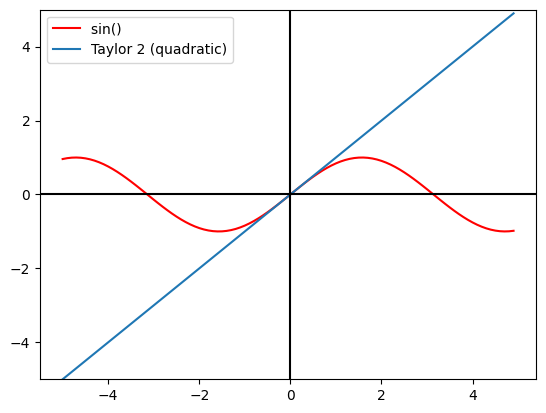

In [343]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin3 = [taylor(sin(x), 0, 3).subs(x,v) for v in values]
legends = ['sin() ','Taylor 2 (quadratic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin3)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

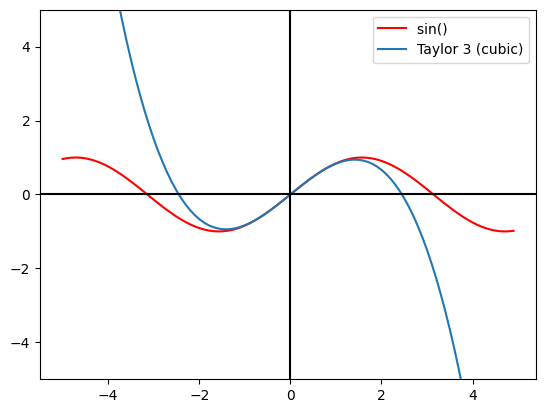

In [344]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin4 = [taylor(sin(x), 0, 4).subs(x,v) for v in values]
legends = ['sin() ','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

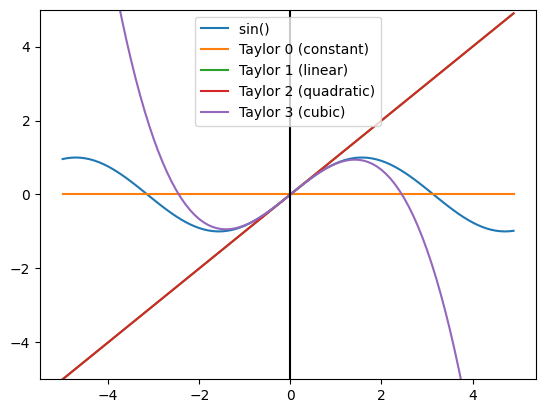

In [345]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin1 = [taylor(sin(x), 0, 1).subs(x,v) for v in values]
t_sin2 = [taylor(sin(x), 0, 2).subs(x,v) for v in values]
t_sin3 = [taylor(sin(x), 0, 3).subs(x,v) for v in values]
t_sin4 = [taylor(sin(x), 0, 4).subs(x,v) for v in values]
legends = ['sin() ','Taylor 0 (constant)','Taylor 1 (linear)','Taylor 2 (quadratic)','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin)
ax.plot(values,t_sin1)
ax.plot(values,t_sin2)
ax.plot(values,t_sin3)
ax.plot(values,t_sin4)

ax.set_ylim([-5,5])
#ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()